We start with the illustration of the CLT. Let's create a large sample from some distribution (for example Poisson) 

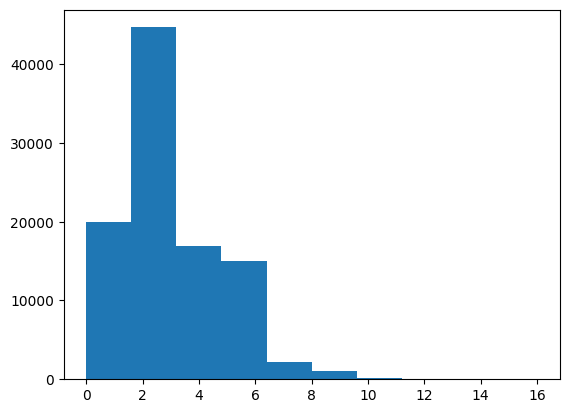

In [3]:
import numpy as np
import matplotlib.pyplot as plt

n = 100000
#s = np.random.exponential(2, size= n)  # np.random.poisson(3, size = n)

# can also try gamma distribution
#shape, scale = 2, 2

# generate distribution
s = np.random.poisson(3, size =n) # np.random.gamma(shape, scale, n)
# check histogram
plt.hist(s)
plt.show() 

Now let's randomly take a sample of a fixed size (say 500) from our already generated Poisson distribution and compute its mean. Then repeat this a fair amount of times (let's say N = 1000 repetitions).
Next: Repeat the whole experiment, this time with increased N

In [25]:
import random

# number of repetitions 
N_repeat = [1000, 8000, 80000]

In [26]:
# a list of sample means; Con
mean_s = []
# fix a sample size we take from Poisson population each experiment
sample_size = 500
# for each number of sampling (1000 to 50000)
for i in N_repeat:
    # mean of a current sample
    cur_sample_mean = []
    # for current number of repetitions
    for j in range(0,i):
        # sampling 500 sample from population
        rc = random.choices(s, k=sample_size)
        # collect mean of each sample
        cur_sample_mean.append(sum(rc)/len(rc))
    # add mean of each sampling to the list
    mean_s.append(cur_sample_mean)

Now let's look at the histogram of the obtained sample of means  

In [ ]:
mean_s

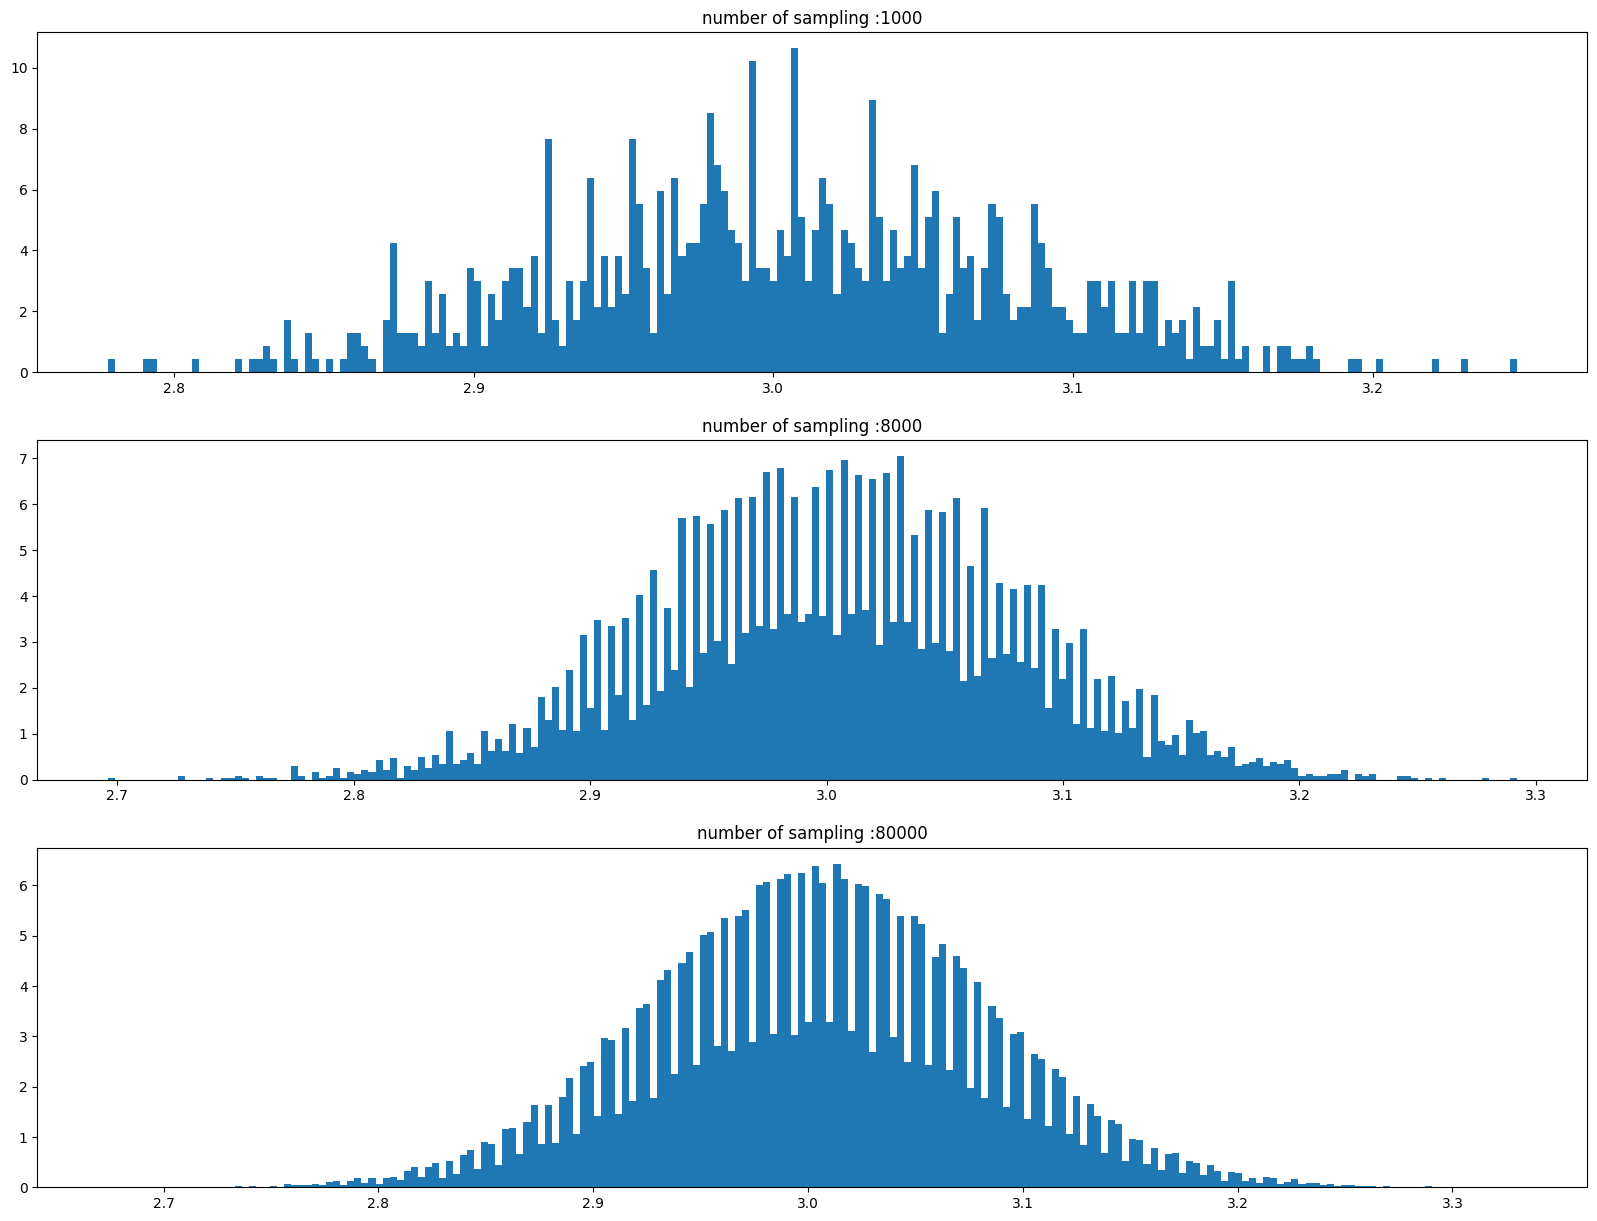

In [27]:
import matplotlib.pyplot as plt
cols = 1
rows = 3
fig, ax = plt.subplots(rows, cols, figsize=(20,15))
n = 0
for i in range(0, rows):
    #for j in range(0, cols):
        ax[i].hist(mean_s[n], 200, density=True)
        ax[i].set_title(label="number of sampling :" + str(N_repeat[n]))
        n += 1
plt.show()

Some work with point estimates: generate a population then compute a point estimate

In [28]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math


# geenrate some data from Poisson distribution
population= stats.poisson.rvs(mu=10, size=1500000)
#population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
#population_ages = np.concatenate((population_ages1, population_ages2))


rand_sample = np.random.choice(a= population, size=500)

print(rand_sample.mean())
print(population.mean())

10.332
9.997086666666666


Estimate proportion of the population, for example the proportion of people who have certain eye color

In [ ]:
# generate a population as a tuple and assign an eye color 
population_eye_color = (['blue']*1000) + (['green']*2500) + (['gray']*3000) +(['brown']*3500) +(['mixed']*2000)

# get all colors (take unique values from the list)
all_colors =set(population_eye_color)

print(population_eye_color)

random.shuffle(population_eye_color)

type(population_eye_color)


#population_eye_color = list(population_eye_color)

# sample 500 values 
k = 500

rand_samp = random.sample(population_eye_color, k)


# for each color in the list compute the proportion relative to the whole population and the proportion in a sample
for cur_color in all_colors:
    print(cur_color, ' real proportion:', population_eye_color.count(cur_color)/len(population_eye_color), ', sample estimate:', rand_samp.count(cur_color)/len(rand_samp))


Let's check how precise are the estimates by computing the confidnce interval for them

In [30]:
# take a sample
k = 1000
population_samp = np.random.choice(a = population, size = k)

# compute 95-% CI. Then the quantile
z = 1.96
ci_lower = population_samp.mean() -  z * (population_samp.std()/np.sqrt(k))
ci_upper = population_samp.mean() +  z * (population_samp.std()/np.sqrt(k))

true_mean = population.mean()
print('The 95-% CI: ', ci_lower, ci_upper)
print('True mean: ', true_mean)



The 95-% CI:  9.763497304697863 10.154502695302137
True mean:  9.997086666666666


Some material from Utils.py

In [140]:
# dont forget to import utils using modules
from utils import makeEDF, plotEDF, basic_stats

import numpy as np
import pandas as pd

# data contains both numerical and categorical values
my_data  = pd.read_csv('breast_cancer.csv')

my_data['radius_mean']
# info from data
basic_stats(my_data['radius_mean'])

# build a histogram



mean: 14.13	std: 3.52	skew: 0.94	kurtosis: 3.83


Plotting of histogram and distribution functions

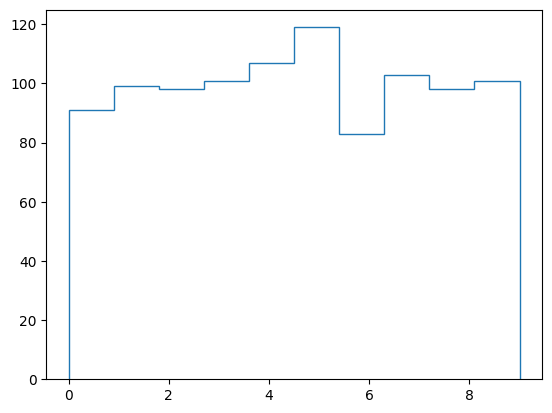

In [165]:
r = np.random.randint(0, 10, size = 1000)

counts, bins = np.histogram(r)
plt.stairs(counts, bins)
plt.show()





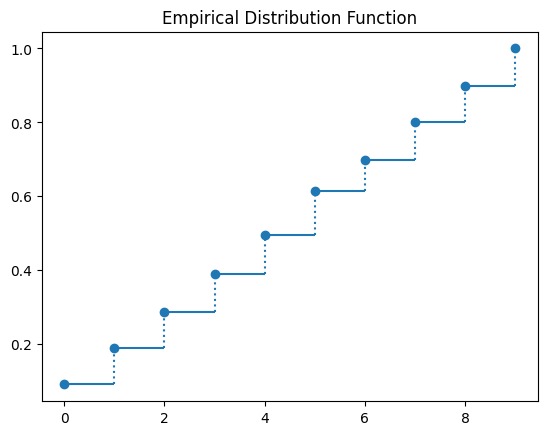

In [166]:
my_edf = makeEDF(r)
my_edf

plotEDF(my_edf)